In [22]:
import os


import deepchem as dc
import pandas as pd
import pickle
import numpy as np
import warnings
import tensorflow as tf

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
tf.get_logger().setLevel('ERROR')

from utils import *
warnings.filterwarnings('ignore')

In [27]:
amino = pd.read_csv('dicts/amino_44/amino_44_physics_calcs.csv')
amino['cha'] = amino['chagb']
amino['gbnsr6'] = amino['zap9']
amino['temp'] = amino['asc']
amino.drop(['asc'],axis=1,inplace=True)
amino['asc'] = amino['temp']
amino['igb5'] = amino['igb']
amino.drop(['zap9', 'chagb','igb','bestgb','temp'], axis=1,inplace=True)
amino['null'] = 0
amino

,amino_acid,smiles,tip3p,cha,gbnsr6,asc,igb5,null
0,ala2-abt,CNC(=O)[C@H](C)NC(C)O,-17.86,-17.6680,-13.47670,-16.482,-18.283,0
1,ala-abt,CNC(=O)[C@H](C)NC(C)O,-14.01,-13.4394,-10.10850,-13.584,-14.476,0
2,arg2-abt,CNC(=O)[C@H](CCCNC(N)=[NH2+])NC(C)O,-77.28,-79.8774,-77.95410,-88.221,-79.478,0
3,arg-abt,CNC(=O)[C@H](CCCNC(N)=[NH2+])NC(C)O,-60.99,-64.0845,-62.80430,-62.978,-61.841,0
4,ash2-abt,CNC(O)C(CC(O)O)NC(C)O,-22.03,-20.4208,-18.20280,-22.452,-24.048,0
5,ash-abt,CNC(O)C(CC(O)O)NC(C)O,-16.74,-16.1625,-14.24490,-17.754,-18.555,0
6,asn2-abt,CNC(=O)[C@H](CC(N)=O)NC(C)O,-23.38,-23.6501,-19.61220,-24.589,-25.578,0
7,asn-abt,CNC(=O)[C@H](CC(N)=O)NC(C)O,-20.88,-20.9514,-17.31750,-21.812,-23.062,0
8,asp2-abt,CNC(=O)[C@H](CC(=O)O)NC(C)O,-79.38,-78.4700,-66.46720,-82.609,-80.504,0
9,asp-abt,CNC(=O)[C@H](CC(=O)O)NC(C)O,-77.86,-78.8793,-66.81660,-83.390,-79.252,0


In [28]:
featurizer = dc.feat.ConvMolFeaturizer(per_atom_fragmentation=False)
amino_X=featurizer.featurize(amino['smiles'].to_numpy())
params = {'epochs' : 500, 'dropout' : 0.4, 'batch_normalize' : False, 'batch_size' : 100, 
           'dense_layer_size' : 27, 'graph_conv_layers' : [32, 32]}

In [104]:

feats = {'tip3p':79,'cha':43,'gbnsr6':26,'asc':83,'igb5':1,'null':4}
amino_results = amino.copy()
# model_index = 
for feat in feats:
    # print(feats[feat])
    model = dc.models.GraphConvModel(n_tasks=1, graph_conv_layers=params['graph_conv_layers'],
                                 mode='regression', dropout=params['dropout'], 
                                 batch_normalize=params['batch_normalize'], 
                                 batch_size=params['batch_size'], 
                                 dense_layer_size=params['dense_layer_size'],
                                 model_dir = 'tests/'+feat+'/model_'+str(feats[feat]))
    model.restore()
    preds = np.array(model.predict_on_batch(amino_X))
    amino_results[feat+'_ml'] = preds
    amino_results[feat+'_with_ml'] = amino_results[feat]+amino_results[feat+'_ml']
    print(feat)
    print('rmsd for physics model compared to tip3p:',np.round(rmsd(amino_results['tip3p'],amino_results[feat]),3))
    print('rmsd for physics + ML compared to tip3p:',np.round(rmsd(amino_results['tip3p'],amino_results[feat+'_with_ml']),3))
amino_results.drop(['smiles'],axis=1)#.describe()

tip3p
rmsd for physics model compared to tip3p: 0.0
rmsd for physics + ML compared to tip3p: 1.543
cha
rmsd for physics model compared to tip3p: 1.241
rmsd for physics + ML compared to tip3p: 1.601
gbnsr6
rmsd for physics model compared to tip3p: 5.455
rmsd for physics + ML compared to tip3p: 4.556
asc
rmsd for physics model compared to tip3p: 3.962
rmsd for physics + ML compared to tip3p: 4.291
igb5
rmsd for physics model compared to tip3p: 1.558
rmsd for physics + ML compared to tip3p: 2.852
null
rmsd for physics model compared to tip3p: 36.39
rmsd for physics + ML compared to tip3p: 29.688


,amino_acid,tip3p,cha,gbnsr6,asc,igb5,null,tip3p_ml,tip3p_with_ml,cha_ml,cha_with_ml,gbnsr6_ml,gbnsr6_with_ml,asc_ml,asc_with_ml,igb5_ml,igb5_with_ml,null_ml,null_with_ml
0,ala2-abt,-17.86,-17.6680,-13.47670,-16.482,-18.283,0,-1.931550,-19.791550,-1.744134,-19.412134,-2.127026,-15.603726,-1.783241,-18.265241,-1.740132,-20.023132,-8.678933,-8.678933
1,ala-abt,-14.01,-13.4394,-10.10850,-13.584,-14.476,0,-1.931550,-15.941550,-1.744134,-15.183534,-2.127026,-12.235526,-1.783241,-15.367241,-1.740132,-16.216132,-8.678933,-8.678933
2,arg2-abt,-77.28,-79.8774,-77.95410,-88.221,-79.478,0,-0.952967,-78.232967,-1.655819,-81.533219,-1.847861,-79.801961,-1.320348,-89.541348,-1.410825,-80.888825,-10.367353,-10.367353
3,arg-abt,-60.99,-64.0845,-62.80430,-62.978,-61.841,0,-0.952967,-61.942967,-1.655819,-65.740319,-1.847861,-64.652161,-1.320348,-64.298348,-1.410825,-63.251825,-10.367353,-10.367353
4,ash2-abt,-22.03,-20.4208,-18.20280,-22.452,-24.048,0,-1.754027,-23.784027,-2.412939,-22.833739,-2.296534,-20.499334,-2.406974,-24.858974,-1.970345,-26.018345,-8.898664,-8.898664
5,ash-abt,-16.74,-16.1625,-14.24490,-17.754,-18.555,0,-1.754027,-18.494027,-2.412939,-18.575439,-2.296534,-16.541434,-2.406974,-20.160974,-1.970345,-20.525345,-8.898664,-8.898664
6,asn2-abt,-23.38,-23.6501,-19.61220,-24.589,-25.578,0,-1.865356,-25.245356,-1.565335,-25.215435,-2.269579,-21.881779,-1.566145,-26.155145,-1.715218,-27.293218,-9.893313,-9.893313
7,asn-abt,-20.88,-20.9514,-17.31750,-21.812,-23.062,0,-1.865356,-22.745356,-1.565335,-22.516735,-2.269579,-19.587079,-1.566145,-23.378145,-1.715218,-24.777218,-9.893313,-9.893313
8,asp2-abt,-79.38,-78.4700,-66.46720,-82.609,-80.504,0,1.341657,-78.038343,-0.679537,-79.149537,-0.072625,-66.539825,0.801193,-81.807807,0.282702,-80.221298,-9.532860,-9.532860
9,asp-abt,-77.86,-78.8793,-66.81660,-83.390,-79.252,0,1.341657,-76.518343,-0.679537,-79.558837,-0.072625,-66.889225,0.801193,-82.588807,0.282702,-78.969298,-9.532860,-9.532860


In [31]:
# amino_results.to_csv('dicts/amino_44/amino_44_ml_results.csv',index=False)
amino_results=pd.read_csv('dicts/amino_44/amino_44_ml_results.csv')
# amino_results

44 total amino acids



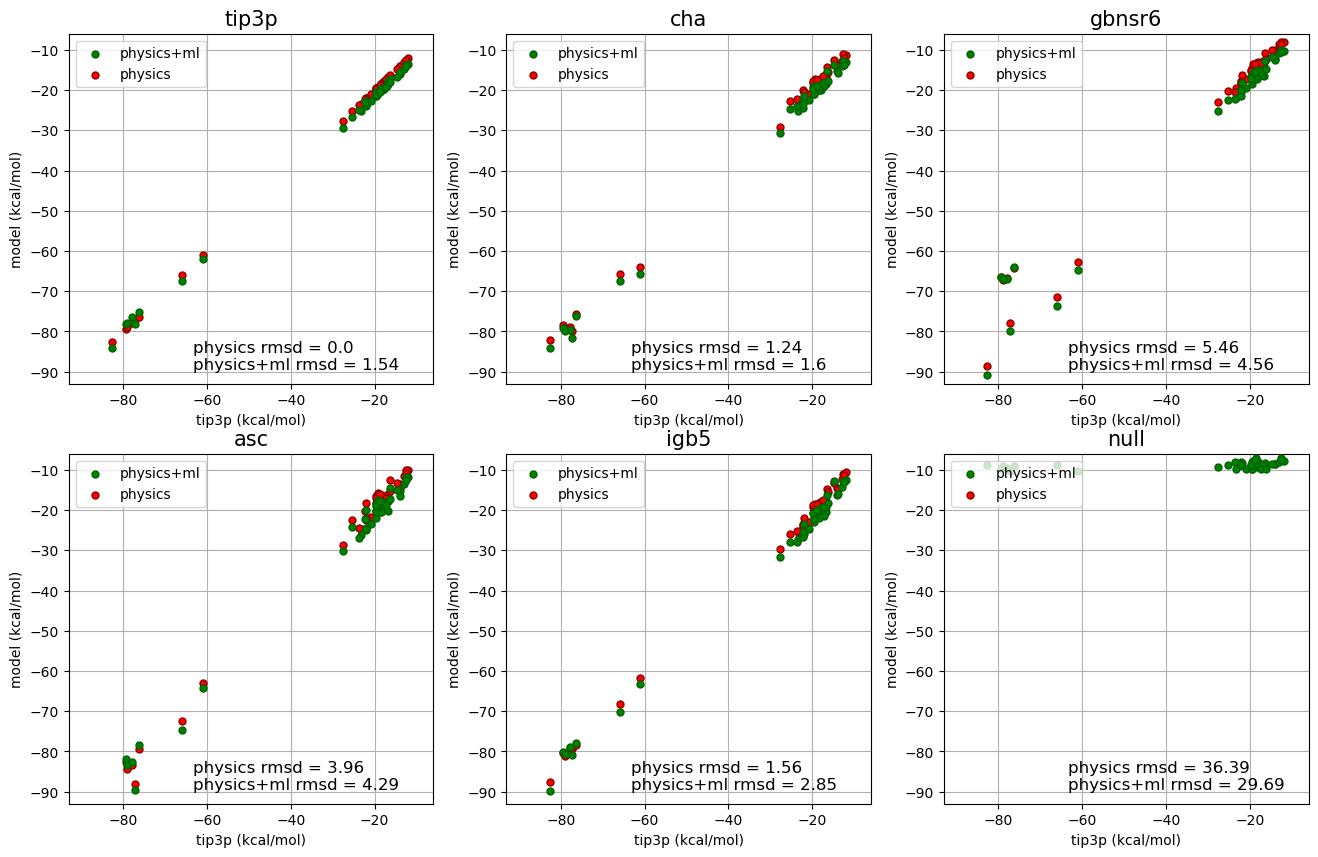

In [113]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
h = 6
f = 92
i=1
tip3p_calc = amino_results[(amino_results.tip3p > -f)]['tip3p']
# tip3p_calc = amino_results[(amino_results.amino_acid != 'arg2-abt') & (amino_results.amino_acid != 'lys2-abt')]['tip3p']
print(len(tip3p_calc),'total amino acids')
print()
feats = {'tip3p':79,'cha':43,'gbnsr6':26,'asc':83,'igb5':1,'null':4}
for feat in feats:
    # print(feat)
    phys_calc = amino_results[(amino_results.tip3p > -f)][feat]
    phys_ml = amino_results[(amino_results.tip3p > -f)][feat+'_with_ml']
    rmsd_phys=np.round(rmsd(tip3p_calc,phys_calc),2)
    rmsd_ml=np.round(rmsd(tip3p_calc,phys_ml),2)
    # print('physics model compared to tip3p: rmsd =',rmsd_phys)
    # print('rmsd for physics + ML compared to tip3p:',rmsd_ml)
    plt.subplot(2, 3, i)
    i+=1
    plt.title(feat,fontsize=15.)
    plt.grid(True)
    plt.xlim([-f-1,-h])
    plt.ylim([-f-1, -h])
    plt.scatter(tip3p_calc,phys_ml, label = "physics+ml",color='green',edgecolors='darkgreen',zorder=3,s=25)
    plt.scatter(tip3p_calc,phys_calc, label = "physics",color='red',edgecolors='darkred',zorder=2,s=25)
    plt.legend(loc='upper left')
    plt.xlabel("tip3p (kcal/mol)")
    plt.ylabel("model (kcal/mol)")
    plt.text(-f+(f-h)/3, -f-1+(f-h)/25, 'physics rmsd = '+str(rmsd_phys)+'\nphysics+ml rmsd = '+str(rmsd_ml),fontsize=12.)#, bbox=dict(fill=False, edgecolor='red', linewidth=2))

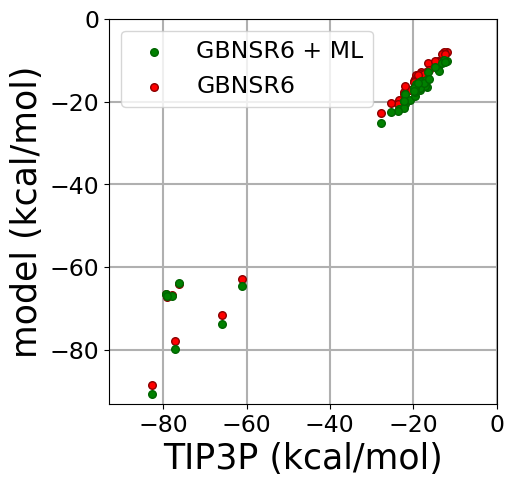

In [114]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
h = 0
f = 92
i=1
tip3p_calc = amino_results[(amino_results.tip3p > -f)]['tip3p']
feat = 'gbnsr6'
phys_calc = amino_results[(amino_results.tip3p > -f)][feat]
phys_ml = amino_results[(amino_results.tip3p > -f)][feat+'_with_ml']

rmsd_phys=np.round(rmsd(tip3p_calc,phys_calc),3)
rmsd_ml=np.round(rmsd(tip3p_calc,phys_ml),3)
# print('physics model compared to tip3p: rmsd =',rmsd_phys)
# print('rmsd for physics + ML compared to tip3p:',rmsd_ml)
# plt.subplot(2, 3, i)
i+=1
# plt.title(,fontsize=15.)
plt.grid(True,linewidth=1.5)
plt.xlim([-f-1,-h])
plt.ylim([-f-1, -h])
plt.scatter(tip3p_calc,phys_ml, label = "GBNSR6 + ML",color='green',edgecolors='darkgreen',zorder=3,s=30)
plt.scatter(tip3p_calc,phys_calc, label = "GBNSR6",color='red',edgecolors='darkred',zorder=2,s=30)
plt.legend(loc='upper left',fontsize = 17)
plt.xlabel("TIP3P (kcal/mol)",fontsize = 25)
plt.ylabel("model (kcal/mol)",fontsize = 25)
plt.xticks(fontsize=17)
_=plt.yticks(fontsize=17)
# plt.text(-f+(f-h)/3, -f-1+(f-h)/25, 'physics rmsd = '+str(rmsd_phys)+'\nphysics+ml rmsd = '+str(rmsd_ml),fontsize=12.)#, bbox=dict(fill=False, edgecolor='red', linewidth=2))

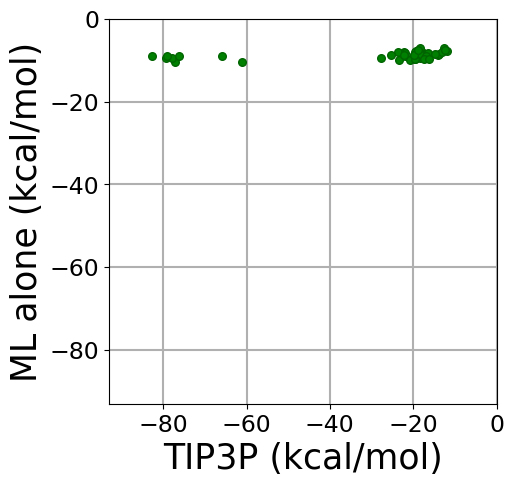

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5),linewidth=5)
h = 0
f = 92
i=1
tip3p_calc = amino_results[(amino_results.tip3p > -f)]['tip3p']
feat = 'null'
phys_calc = amino_results[(amino_results.tip3p > -f)][feat]
phys_ml = amino_results[(amino_results.tip3p > -f)][feat+'_with_ml']

rmsd_phys=np.round(rmsd(tip3p_calc,phys_calc),3)
rmsd_ml=np.round(rmsd(tip3p_calc,phys_ml),3)
# print('physics model compared to tip3p: rmsd =',rmsd_phys)
# print('rmsd for physics + ML compared to tip3p:',rmsd_ml)
# plt.subplot(2, 3, i)
i+=1
# plt.title(,fontsize=15.)
plt.grid(True,linewidth=1.5)
plt.xlim([-f-1,-h])
plt.ylim([-f-1, -h])
plt.scatter(tip3p_calc,phys_ml,color='green',edgecolors='darkgreen',zorder=3,s=30)
# plt.scatter(tip3p_calc,phys_calc, label = "GBNSR6",color='red',edgecolors='darkred',zorder=2,s=30)
# plt.legend(loc='upper left',fontsize = 17)
plt.xlabel("TIP3P (kcal/mol)",fontsize = 25)
plt.ylabel("ML alone (kcal/mol)",fontsize = 25)
plt.xticks(fontsize=17)
_=plt.yticks(fontsize=17)
# plt.text(-f+(f-h)/3, -f-1+(f-h)/25, 'physics rmsd = '+str(rmsd_phys)+'\nphysics+ml rmsd = '+str(rmsd_ml),fontsize=12.)#, bbox=dict(fill=False, edgecolor='red', linewidth=2))